Missing Values
---------------------------------------------------

Number of instances = 1139
Number of attributes = 16
  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

 

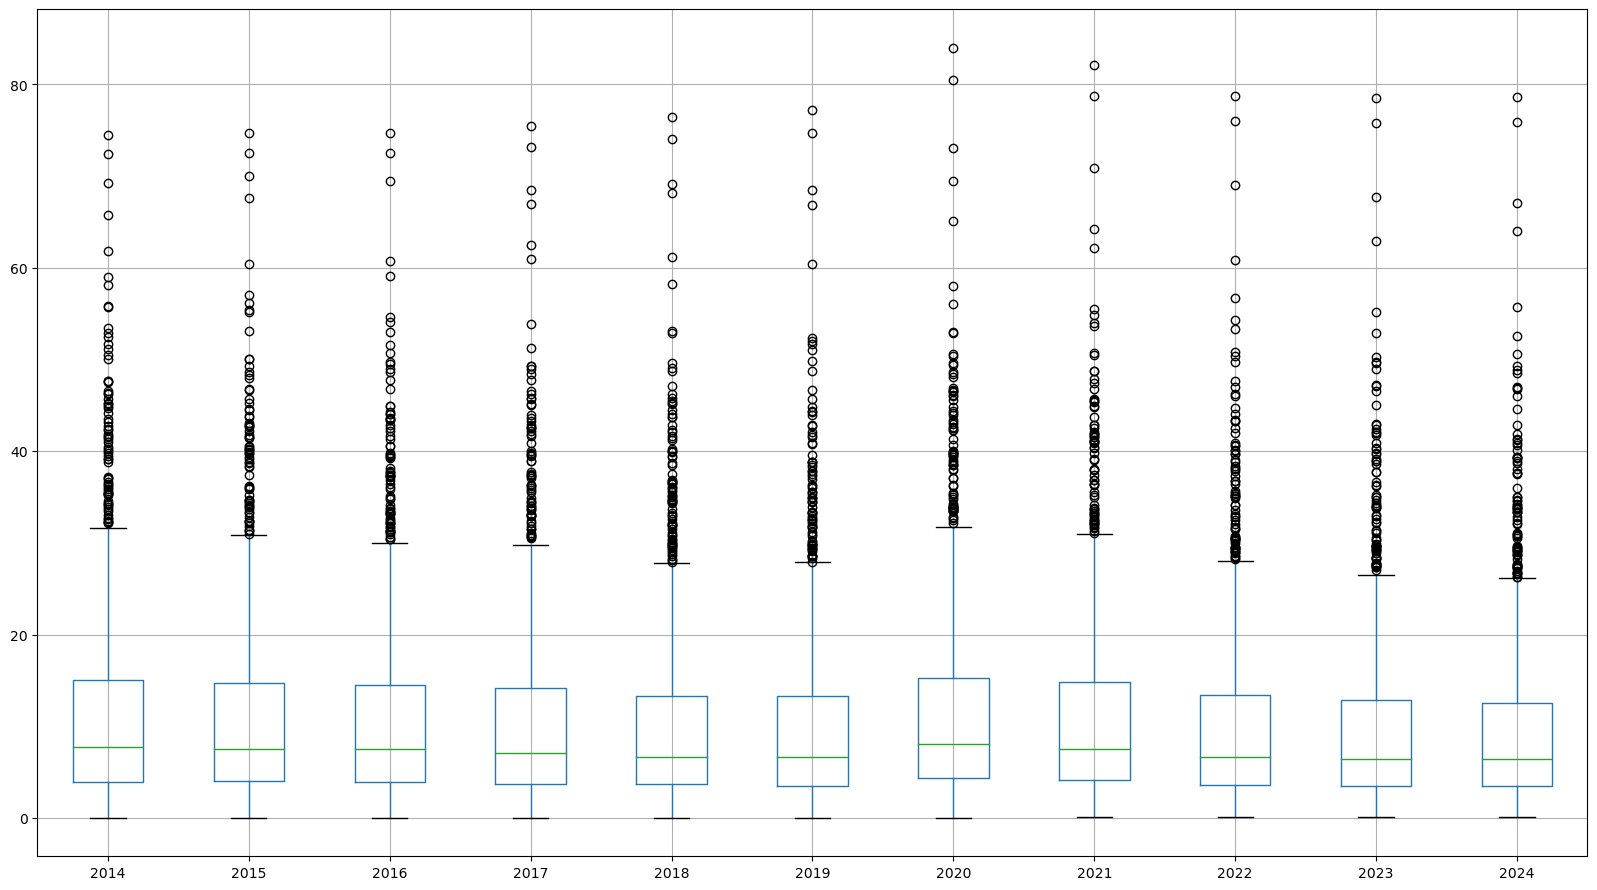

Standardizing the columns:
        2014      2015      2016      2017      2018      2019      2020  \
21  0.557802  0.569218  0.581967  0.594446  0.608818  0.605805  0.422889   
22  2.150391  2.193998  2.234586  2.257826  2.278117  2.290606  2.046347   
23 -0.295332 -0.236484 -0.171830 -0.098630 -0.021324  0.035303 -0.093512   
24  0.329634  0.379588  0.433963  0.491354  0.552016  0.596094  0.440251   
25  0.977354  1.139394  1.345165  1.511279  1.648354  1.768366  2.059614   

        2021      2022      2023      2024  
21  0.400735  0.417566  0.439879  0.428562  
22  1.929694  1.966998  1.991397  1.958311  
23 -0.105822 -0.111476 -0.091242 -0.104414  
24  0.404414  0.394521  0.420264  0.407215  
25  1.405295  1.041616  1.017474  1.009871  

Number of rows before discarding outliers = 1134
Number of rows after discarding outliers = 1089

Shuffling Data Frames
---------------------------------------------------

     country_name                    indicator_name     sex age_group  \

        age_group        2014        2015        2016        2017        2018  \
count  227.000000  227.000000  227.000000  227.000000  227.000000  227.000000   
mean     0.942731   10.673700   10.484242   10.349718    9.978471    9.543815   
std      0.804455    8.964644    8.809550    8.746412    8.537880    8.607261   
min      0.000000    0.070000    0.061000    0.061000    0.061000    0.051000   
25%      0.000000    4.165000    4.277000    4.238500    3.746500    3.609000   
50%      1.000000    7.933000    7.770000    7.495000    7.061000    6.474000   
75%      2.000000   14.272000   13.285000   13.622000   12.961000   11.977500   
max      2.000000   45.236000   42.904000   42.480000   41.705000   52.923000   

             2019        2020        2021        2022        2023        2024  
count  227.000000  227.000000  227.000000  227.000000  227.000000  227.000000  
mean     9.367608   10.907749   10.397573    9.239189    8.855141    8.844348  
std      8.500051    9.190566 

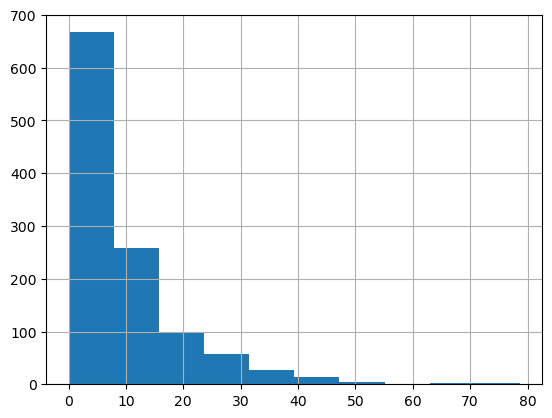

2024
(-0.0186, 19.706]    984
(19.706, 39.352]     126
(39.352, 58.998]      20
(58.998, 78.644]       4
Name: count, dtype: int64
2024
(0.059, 3.484]      284
(3.484, 6.429]      291
(6.429, 12.571]     275
(12.571, 78.644]    284
Name: count, dtype: int64

Feature Normalization
---------------------------------------------------

     country_name  age_group age_categories    2014    2015    2016    2017  \
0     Afghanistan          0          Youth  13.340  15.974  18.570  21.137   
1     Afghanistan          1         Adults   8.576   9.014   9.463   9.920   
2     Afghanistan          2       Children  10.306  11.552  12.789  14.017   
3     Afghanistan          0          Youth   9.206  11.502  13.772  16.027   
4     Afghanistan          1         Adults   6.463   6.879   7.301   7.728   
...           ...        ...            ...     ...     ...     ...     ...   
1134     Zimbabwe          1         Adults   4.262   4.586   4.773   4.900   
1135     Zimbabwe          2      

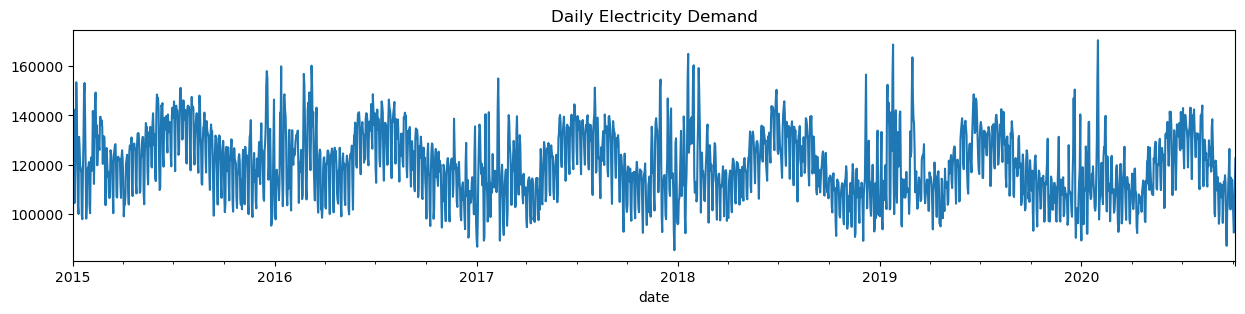

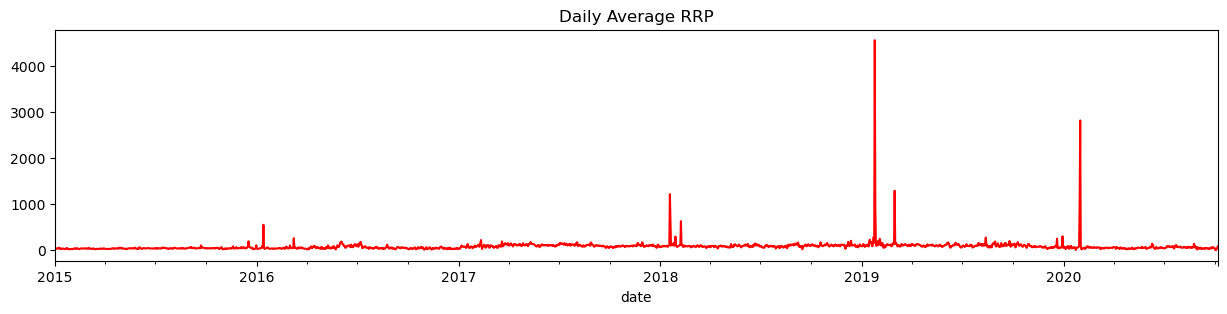

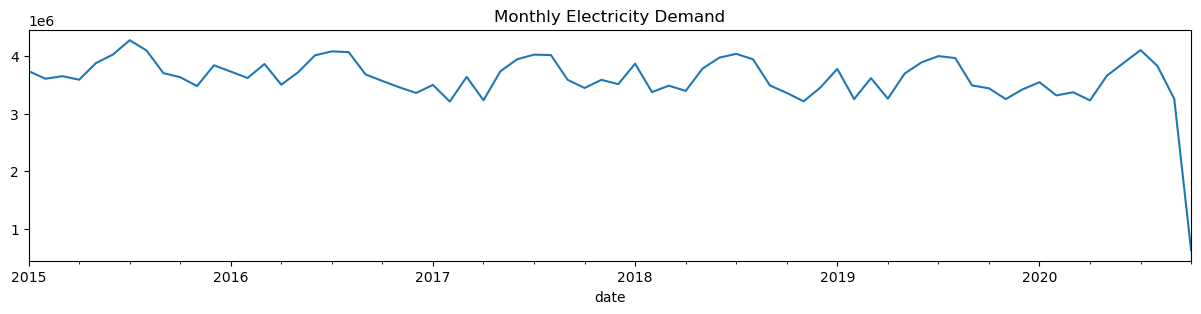

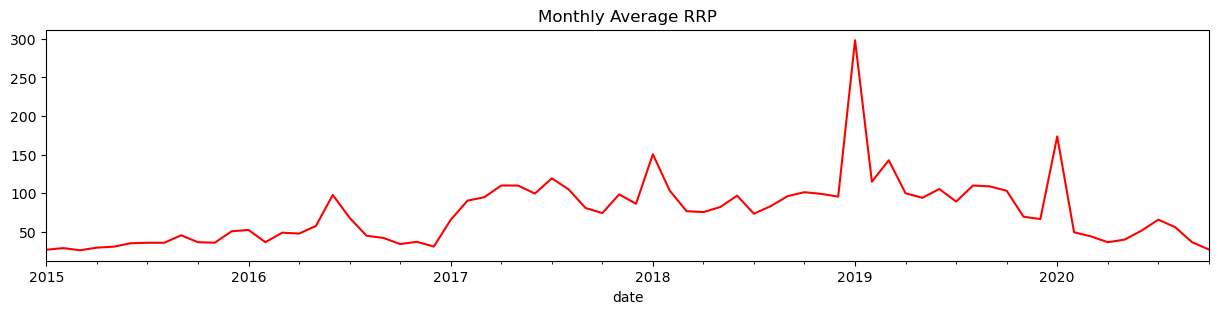

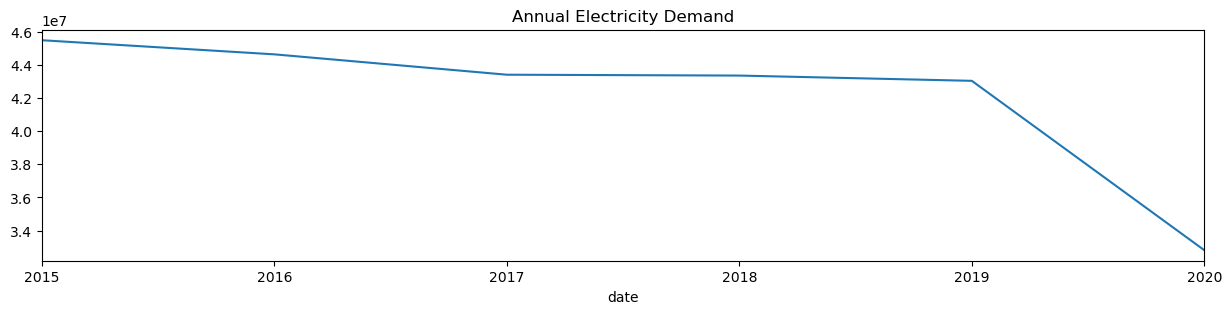

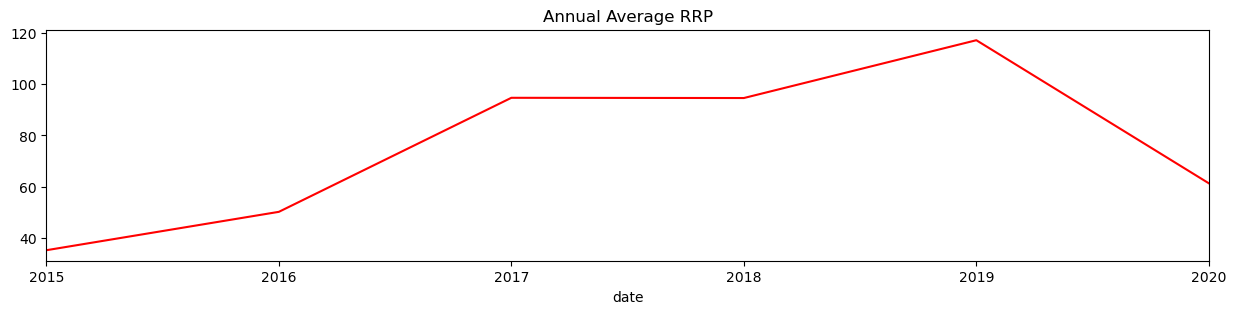


Calculate Fields
---------------------------------------------------

           artist_name                                         track_name  \
0          Miley Cyrus                                            Flowers   
1                  SZA                                          Kill Bill   
2         Harry Styles                                          As It Was   
3            Jung Kook                Seven (feat. Latto) (Explicit Ver.)   
4       Eslabon Armado                                    Ella Baila Sola   
5         Taylor Swift                                       Cruel Summer   
6         Metro Boomin             Creepin' (with The Weeknd & 21 Savage)   
7                 Rema                      Calm Down (with Selena Gomez)   
8             Bizarrap              Shakira: Bzrp Music Sessions, Vol. 53   
9         Taylor Swift                                          Anti-Hero   
10      Arctic Monkeys                                   I Wanna Be Yours   
11   

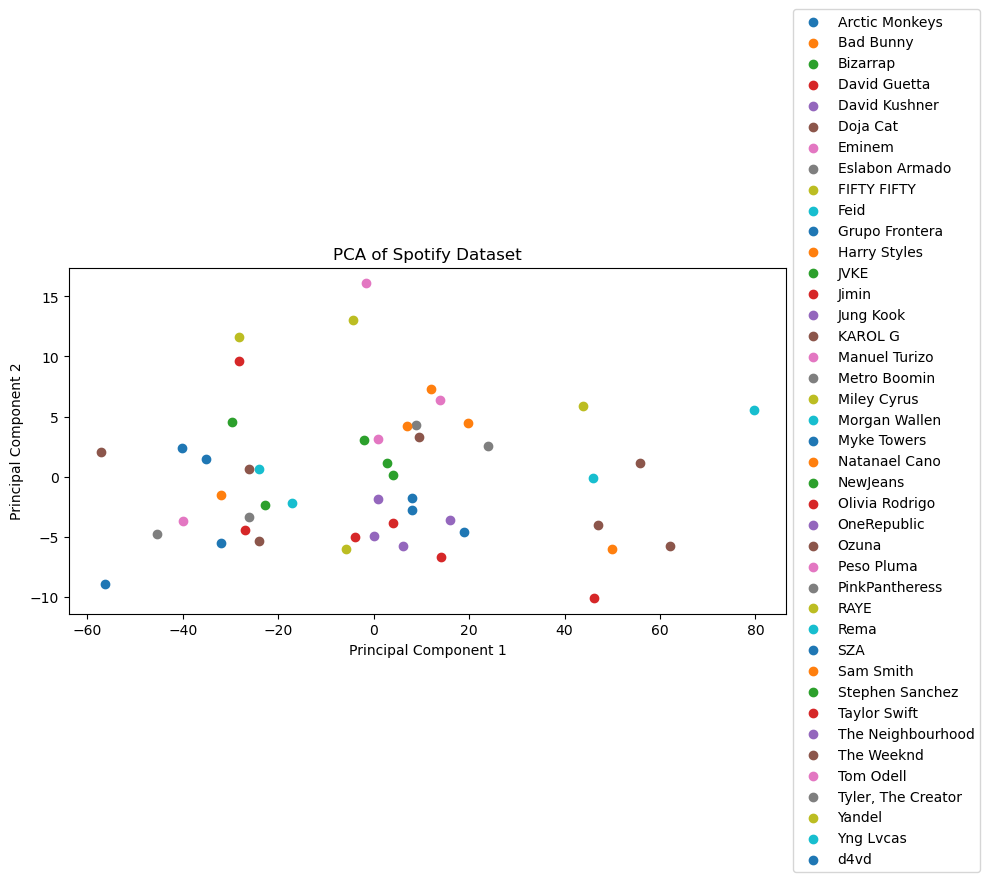

In [4]:
"""
Data Preprocessing 

"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

global data # data = df_unemployment
global dataS # dataS = df_spotify
global dataE # dataE = df_electricity

#Reading the Data Sets from the DataSets Folder(unemployment data set, Spotify data set, electricity data set)
path = "./DataSets/"

filename_read = os.path.join(path,"global_unemployment_data_v2.csv")
df_unemployment = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"top_50_2023.csv")
df_spotify = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"complete_dataset.csv")
df_electricity = pd.read_csv(filename_read, na_values=['NA','?'])


#Missing Values
print('Missing Values')
print("---------------------------------------------------")
print()

df_unemployment.columns = ['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories', '2014',
                '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

print('Number of instances = %d' % (df_unemployment.shape[0]))
print('Number of attributes = %d' % (df_unemployment.shape[1]))
print(df_unemployment.head())

print()
print('Number of missing values:')
for col in df_unemployment.columns:
    print('\t%s: %d' % (col,df_unemployment[col].isna().sum()))
    
data = df_unemployment['2023']
print()
print('Before replacing missing values:')
print(data[755:768])
    
df_unemployment['2022'] = df_unemployment['2022'].fillna(df_unemployment['2022'].median())
df_unemployment['2023'] = df_unemployment['2023'].fillna(df_unemployment['2023'].median())
df_unemployment['2024'] = df_unemployment['2024'].fillna(df_unemployment['2024'].median())

print('\nAfter replacing missing values:')
for col in df_unemployment.columns:
    print('\t%s: %d' % (col,df_unemployment[col].isna().sum()))

print()
data = df_unemployment['2023']
print(data[755:768])
print()

#Duplicate Data 
print('Duplicate Data')
print("---------------------------------------------------")
print()
dups = df_unemployment.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_unemployment.loc[[5,6]])

print()
print('Number of rows before discarding duplicates = %d' % (df_unemployment.shape[0]))
df_unemployment = df_unemployment.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_unemployment.shape[0]))
print()

#Outliers 
print('Outliers')
print("---------------------------------------------------")
print()

%matplotlib inline

data = df_unemployment.drop(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'], axis=1)
data.boxplot(figsize=(20,11))
plt.show()

print('Standardizing the columns:')
Z = (data-data.mean())/data.std()
print(Z[20:25])

print()
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==11) & ((Z <= 3).sum(axis=1)==11),:]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))
print()

#Shuffling Data Frames 
print('Shuffling Data Frames')
print("---------------------------------------------------")
print()
data = df_unemployment.reindex(np.random.permutation(df_unemployment.index))
data.reset_index(inplace=True, drop=True)
print(data)
print()

#Sorting Data Frames 
print('Sorting Data Frames')
print("---------------------------------------------------")
print()
print('Data in Descending Order via Country Name:')
data = df_unemployment.sort_values(by='country_name', ascending=False)
print(data)
print()
print('Data in Ascending Order via Country Name:')
data = df_unemployment.sort_values(by='country_name', ascending=True)
print(data)
print()

#Saving a Data Frame 
print('Shuffling and then Saving a Data Frame')
print("---------------------------------------------------")
print()
filename_write = os.path.join(path, "g_e_shuffle.csv")
data = df_unemployment
data = data.reindex(np.random.permutation(data.index))
data.to_csv(filename_write, index=False)
print('Saving and Shuffling Done. The g_e_shuffle.csv can be found in the DataSets folder.')
print()

#Dropping Fields
print('Dropping Fields')
print("---------------------------------------------------")
print()

print("Before drop: {}".format(df_unemployment.columns))
df_unemployment.drop('indicator_name',axis=1, inplace=True)
print()

print("After Drop: {}".format(df_unemployment.columns))
print()

print(df_unemployment[0:5])
print()

#One Hot Encoding 
print('One Hot Encoding')
print("---------------------------------------------------")
print()
data = df_unemployment
def encode_text_dummy(data, name):
    dummies = pd.get_dummies(data[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        data[dummy_name] = dummies[x]
    data.drop(name, axis=1, inplace=True)

encode_text_dummy(data, "sex")
    
print(data)
print()

#Label Encoding
print('Label Encoding')
print("---------------------------------------------------")
print()
def encode_text_index(df_unemployment, name):
    le = preprocessing.LabelEncoder()
    df_unemployment[name] = le.fit_transform(df_unemployment[name])
    return le.classes_

encode_text_index(df_unemployment, "age_group")

print(df_unemployment)
print()

#Training/Test Splitting and Additional Calculations 
print("Training/Test Split and Additional Calculations")
x_train, x_test, y_train, y_test = train_test_split(df_unemployment[['country_name', 'age_group', 'age_categories', '2014', '2015',
        '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']], df_unemployment['age_group'], test_size=0.2, random_state=42)
print("---------------------------------------------------")
print()
print("Printing the shapes of the training and test sets")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print()

print("Printing Mean, STDEV, and Percentiles")
print(x_train.describe())
print(x_test.describe())
print(y_train.describe())
print(y_test.describe())
print()

#Sampling 
print('Sampling')
print("---------------------------------------------------")
print()

print('First Five Data Values:')
print()
data = df_unemployment
print(data.head())
print()

# Sample 3 
print('Sample Size = 3:')
print()
sample = data.sample(n=3)
print(sample)
print()

# Sample 1% of the data without replacement
print('Sample Size = 1% Without Replacement:')
print()
sample_frac = data.sample(frac=0.01, random_state=1)
print(sample_frac)
print()

# Sample 1% of the data with replacement
print('Sample Size = 1% With Replacement:')
print()
sample_replace = data.sample(frac=0.01, replace=True, random_state=1)
print(sample_replace)
print()

#Discretization 
print('Dicretization')
print("---------------------------------------------------")
print()

data = df_unemployment
data['2024'].hist(bins=10)
plt.show()

equal_width_bins = pd.cut(data['2024'], 4)
print(equal_width_bins.value_counts(sort=False))

equal_freq_bins = pd.qcut(data['2024'], 4)
print(equal_freq_bins.value_counts(sort=False))
print()


#Feature Normalization 
print('Feature Normalization')
print("---------------------------------------------------")
print()

data = df_unemployment
data['2024'] = zscore(data['2024'])

print(data)
print()

#Concatenation 
print('Concatenation')
print("---------------------------------------------------")
print()

data = df_unemployment
col_country_name = data['country_name']
col_age_group = data['age_group']
col_age_categories = data['age_categories']
result = pd.concat([col_country_name, col_age_group, col_age_categories], axis=1)
print(result)
print()

#Aggregation 
print('Aggregation')
print("---------------------------------------------------")
print()

dataE = df_electricity
dataE['date'] = pd.to_datetime(dataE['date'])
dataE.set_index('date', inplace=True)

daily_demand = dataE['demand'].resample('D').sum()
daily_rrp = dataE['RRP'].resample('D').mean()

# show daily demand
ax = daily_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Daily Electricity Demand')
plt.show()

# show daily RRP
ax = daily_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Daily Average RRP')
plt.show()

# Monthly aggregation
monthly_demand = dataE['demand'].resample('M').sum()
monthly_rrp = dataE['RRP'].resample('M').mean()

# Plot monthly demand
ax = monthly_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Monthly Electricity Demand')
plt.show()

# Plot monthly RRP
ax = monthly_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Monthly Average RRP')
plt.show()

# Annual aggregation
annual_demand = dataE['demand'].resample('Y').sum()
annual_rrp = dataE['RRP'].resample('Y').mean()

# show annual demand
ax = annual_demand.plot(kind='line', figsize=(15, 3))
ax.set_title('Annual Electricity Demand')
plt.show()

# show annual RRP
ax = annual_rrp.plot(kind='line', figsize=(15, 3), color='red')
ax.set_title('Annual Average RRP')
plt.show()
print()

#Calculate Fields
print('Calculate Fields')
print("---------------------------------------------------")
print()
dataS = df_spotify
dataS['mood_score'] = dataS[['danceability', 'valence', 'energy']].mean(axis=1)
print(dataS[['artist_name', 'track_name', 'danceability', 'valence', 'energy', 'mood_score']])
print()

#PCA 
print('PCA')
print("---------------------------------------------------")
print()

dataS = df_spotify
features = ['danceability', 'valence', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'popularity']
x = dataS.loc[:, features].values
#x = StandardScaler().fit_transform(x)
numComponents = 2
pca = PCA(n_components=numComponents)
principalComponents = pca.fit_transform(x)
df_principal = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
df_principal['artist_name'] = dataS['artist_name']
plt.figure(figsize=(10, 7))
groups = df_principal.groupby('artist_name')
for name, group in groups:
    plt.scatter(group.pc1, group.pc2, label=name)

plt.title('PCA of Spotify Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()